https://github.com/CSSEGISandData/COVID-19

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_confirmed = pd.read_csv('./csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv')
df_deaths = pd.read_csv('./csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv')
df_recovered = pd.read_csv('./csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv')

In [3]:
sorted(df_confirmed['Country/Region'].unique())[:5]

['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Antigua and Barbuda']

In [4]:
euro = [
'Austria',
'Belarus',
'Belgium',
'Bosnia and Herzegovina',
'Bulgaria',
'Croatia',
'Cyprus',
'Czechia',
'Denmark',
'Estonia',
'Finland',
'France',
'Germany',
'Greece',
'Hungary',
'Ireland',
'Italy',
'Latvia',
'Liechtenstein',
'Lithuania',
'Luxembourg',
'Malta',
'Monaco',
'Moldova',
'Netherlands',
'North Macedonia',
'Norway',
'Poland',
'Portugal',
'Romania',
'Serbia',
'Slovakia',
'Slovenia',
'Spain',
'Sweden',
'Switzerland',
'Ukraine',
'United Kingdom'
]

In [5]:
# remove first 4 columns and sum each day for a particular list of counties
def preprocess(df, countries):
    df_country = df[df['Country/Region'].isin(countries)].drop(df.columns[0:4], axis=1)
    df_country = df_country.apply(lambda c: np.sum(c), axis=0) # returns a series
    dates, ts_data = list(map(lambda i: i[:-3], df_country.index)), list(df_country)
    return dates, ts_data

### China
Time series of infections in China

In [6]:
dates, ts_infections_china = preprocess(df_confirmed, ['China'])
_, ts_deaths_china = preprocess(df_deaths, ['China'])
_, ts_recovered_china = preprocess(df_recovered, ['China'])

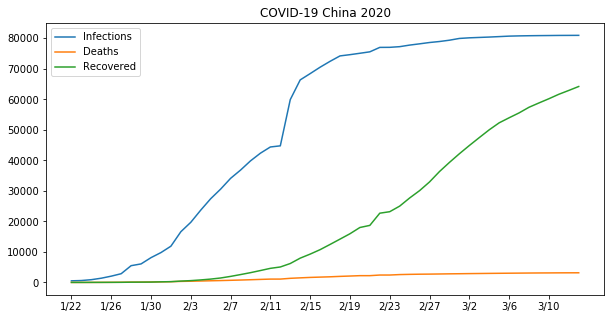

In [12]:
plt.figure(figsize=(10,5))
plt.plot(dates, ts_infections_china, label="Infections")
plt.plot(dates, ts_deaths_china, label="Deaths")
plt.plot(dates, ts_recovered_china, label="Recovered")
plt.xticks(range(0, len(dates), 4))
plt.legend()
plt.title('COVID-19 China 2020')
plt.show()

### Europe
Time series of infections in Europe

In [8]:
df_euro = df_confirmed[df_confirmed['Country/Region'].isin(euro)].drop(df_confirmed.columns[0:4], axis=1)
df_euro = df_euro.apply(lambda c: np.sum(c), axis=0) # returns a series
ts_infections_euro = list(df_euro)

In [9]:
dates, ts_infections_euro = preprocess(df_confirmed, euro)
dates, ts_deaths_euro = preprocess(df_deaths, euro)
dates, ts_recovered_euro = preprocess(df_recovered, euro)

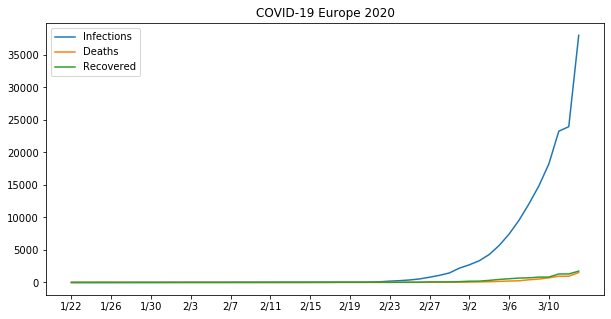

In [13]:
plt.figure(figsize=(10,5))
plt.plot(dates, ts_infections_euro, label="Infections")
plt.plot(dates, ts_deaths_euro, label="Deaths")
plt.plot(dates, ts_recovered_euro, label="Recovered")
plt.xticks(range(0, len(dates), 4))
plt.legend()
plt.title('COVID-19 Europe 2020')
plt.show()